### Step 1: Has the increase in Co-vid 19 cases affected the demand for investments in the tech retail industry in the USA?

#### Step 2: Packages need to perform data analysis

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas_datareader.data as web
import datetime as dt
sns.set()

#### Step 3: Reading in Co-vid 19 global data received from WHO and Share price data of Amazon and GAP Inc from yahoo finance

In [12]:
data = pd.read_csv('WHO-COVID-19-global-data.csv')
data

start = dt.datetime(2020, 1, 20)
end = dt.datetime(2020, 6, 20)

df_amazon = web.DataReader('AMZN', 'yahoo', start, end)
df_GAP = web.DataReader('GPS','yahoo', start, end)
df_GAP.reset_index(inplace = True)
df_amazon.reset_index(inplace = True)

#### Step 4: Checking if the data received is clean

In [13]:
data.isna()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
23017,False,False,False,False,False,False,False,False
23018,False,False,False,False,False,False,False,False
23019,False,False,False,False,False,False,False,False
23020,False,False,False,False,False,False,False,False


In [14]:
df_amazon.isna()

,Date,High,Low,Open,Close,Volume,Adj Close
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
101,False,False,False,False,False,False,False
102,False,False,False,False,False,False,False
103,False,False,False,False,False,False,False
104,False,False,False,False,False,False,False


In [15]:
df_GAP.isna()

,Date,High,Low,Open,Close,Volume,Adj Close
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
101,False,False,False,False,False,False,False
102,False,False,False,False,False,False,False
103,False,False,False,False,False,False,False
104,False,False,False,False,False,False,False


#### Step 5: Analysizing of data

In [22]:
data.Date_reported = pd.to_datetime(data.Date_reported)
data.New_cases.describe()

count    23022.000000
mean       369.477326
std       2013.510834
min      -3525.000000
25%          0.000000
50%          5.000000
75%         71.000000
max      38509.000000
Name: New_cases, dtype: float64

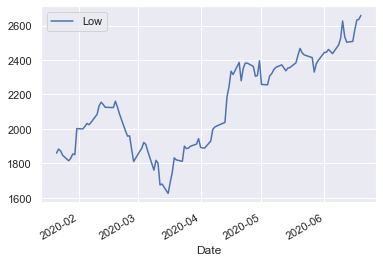

In [17]:
df_amazon.Date = pd.to_datetime(df_amazon.Date)
df_amazon.plot(x='Date', y='Low', kind='line')

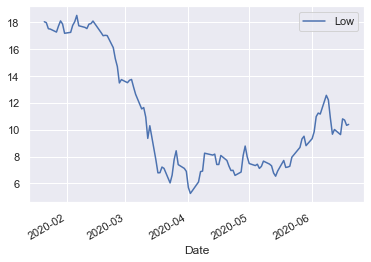

In [18]:
df_GAP.Date = pd.to_datetime(df_GAP.Date)
df_GAP.plot(x='Date', y='Low', kind='line')

In [19]:
df_america = data[data.Country=='United States of America']
df_america

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
22066,2020-01-20 00:00:00+00:00,US,United States of America,AMRO,1,1,0,0
22067,2020-01-21 00:00:00+00:00,US,United States of America,AMRO,0,1,0,0
22068,2020-01-22 00:00:00+00:00,US,United States of America,AMRO,0,1,0,0
22069,2020-01-23 00:00:00+00:00,US,United States of America,AMRO,0,1,0,0
22070,2020-01-24 00:00:00+00:00,US,United States of America,AMRO,1,2,0,0
...,...,...,...,...,...,...,...,...
22214,2020-06-16 00:00:00+00:00,US,United States of America,AMRO,21754,2079592,372,115484
22215,2020-06-17 00:00:00+00:00,US,United States of America,AMRO,18514,2098106,496,115980
22216,2020-06-18 00:00:00+00:00,US,United States of America,AMRO,27921,2126027,722,116702
22217,2020-06-19 00:00:00+00:00,US,United States of America,AMRO,23139,2149166,770,117472


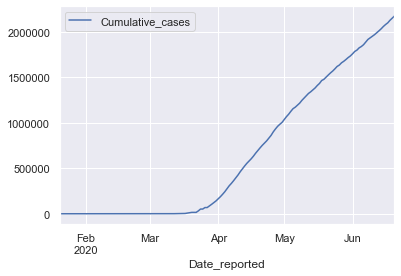

In [20]:
df_america.plot(x='Date_reported', y='Cumulative_cases', kind= 'line')

#### Step 6: Interpretation of results

In this investigation we looked at how the growth in Co-vid 19 cases globally, in this case we looked at the USA, affected the lowest share prices
   of Amazon stock and GAP Inc stock (which is one of the largest global clothing retailers). It was noted that industries started 
   getting affected adversely before the spike in cumulative cases in the USA but as the situation was getting worse in the USA
   some tech retailers such as Amazon started experiencing an increase in their lowest daily share price while companies like
   GAP Inc lowest share price continued to plummet gradually. 
   
   This occurrence may suggest that there has been a change in investment preference by top global investors, where
   they chose to now invest more in the tech industry and less in the other industries, which subsequently drove the lowest
   prices high (due to higher demand).